##### Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sympy
import pandas as pd
from Porticos_2D import matriz_local
from Porticos_2D import matriz_T

from IPython.display import Image

# Importación
# from sympy import init_session
# init_session(use_latex=True)

##### Importar imagen del problema a resolver

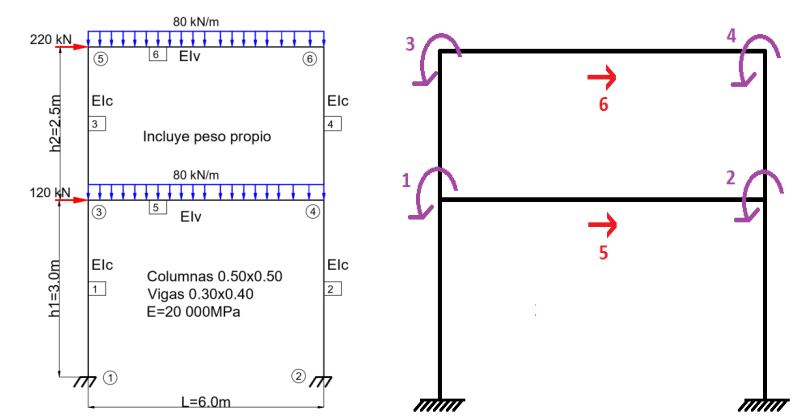

In [2]:
Image('Ejemplo_01.png')

##### Lectura de la geometría del Problema

In [3]:
Elementos = pd.read_csv('Ejemplo_1.0.csv')
Elementos

,Id,E,A,I,Ni,Nf,xi,yi,xf,yf,resx_i,resy_i,resz_i,resx_f,resy_f,resz_f,l1,l2,w1,w2
0,1,20000000,0.25,0.005208,1,3,0.0,0.0,0.0,3.0,1,1,1,0,1,0,0.0,0.0,0.0,0.0
1,2,20000000,0.25,0.005208,2,4,6.0,0.0,6.0,3.0,1,1,1,0,1,0,0.0,0.0,0.0,0.0
2,3,20000000,0.25,0.005208,3,5,0.0,3.0,0.0,5.5,0,1,0,0,1,0,0.0,0.0,0.0,0.0
3,4,20000000,0.25,0.005208,4,6,6.0,3.0,6.0,5.5,0,1,0,0,1,0,0.0,0.0,0.0,0.0
4,5,20000000,0.12,0.001600,3,4,0.0,3.0,6.0,3.0,0,1,0,0,1,0,0.0,0.0,80.0,80.0
5,6,20000000,0.12,0.001600,5,6,0.0,5.5,6.0,5.5,0,1,0,0,1,0,0.0,0.0,80.0,80.0


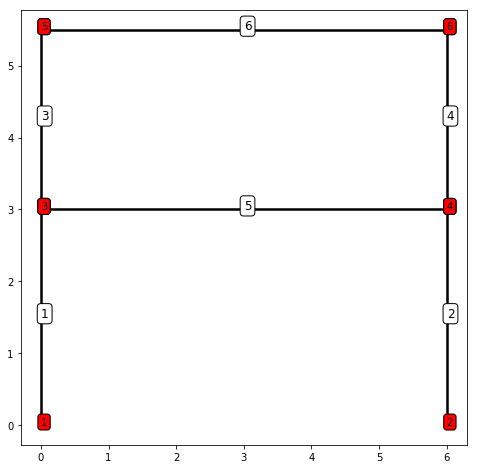

In [4]:
El = [None] * len(Elementos)

plt.figure(figsize=(8,8))

props1 = dict(boxstyle='round', facecolor='white', alpha=1.0)
props2 = dict(boxstyle='round', facecolor='red', alpha=1.0)

for i in np.arange(len(Elementos)):

    Id = Elementos.loc[i]['Id']
    Ni = Elementos.loc[i]['Ni']
    Nf = Elementos.loc[i]['Nf']
    xi = Elementos.loc[i]['xi']
    yi = Elementos.loc[i]['yi']
    xf = Elementos.loc[i]['xf']
    yf = Elementos.loc[i]['yf']
    
    plt.plot([xi, xf],[yi, yf], '-k', lw=2.5)
    plt.plot([xi, xf],[yi, yf], 'or', lw=1.0)
    
    plt.text((xf + xi)*0.5, (yf + yi)*0.5, np.int(Id), fontsize=12, bbox=props1)
    plt.text(xi, yi, np.int(Ni), fontsize=10, bbox=props2)
    plt.text(xf, yf, np.int(Nf), fontsize=10, bbox=props2)

In [5]:
def crear_elemento(Id, E, A, I, Ni, Nf, xi, yi, xf, yf, resx_i, resy_i, resz_i, resx_f, resy_f, resz_f, L1, L2, w1, w2):
    
    ID = Id
    L = ((xf - xi) ** 2 + (yf - yi) ** 2) ** 0.5
    Cx = (xf - xi) / L
    Cy = (yf - yi) / L
    Rest_i = [resx_i, resy_i, resz_i]
    Rest_f = [resx_f, resy_f, resz_f]
    
    ### Momentos y Cortantes de Empotramiento
    
    FSb1 = ((w1*(L-L1)**3)/(20*L**3)) * ((7*L + 8*L1) - ((L2*(3*L + 2*L1))/(L-L1)) * (1 + (L2/(L-L1)) + ((L2**2)/(L-L1)**2) + (2*L2**4/(L-L1)**3)))
    FSb2 = ((w2*(L-L1)**3)/(20*L**3)) * ((3*L + 2*L1) * (1 + (L2/(L-L1)) + ((L2**2)/(L-L1)**2)) - (L2**3/(L-L1)**2) * (2 + (15*L-8*L2)/(L-L1)))
    FSb = FSb1 + FSb2
    
    FMb1 = ((w1*(L-L1)**3)/(60*L**2)) * (3*(L + 4*L1) - L2*(2*L + 3*L1)/(L-L1) * (1 + (L2/(L-L1)) + (L2**2)/(L-L1)**2) + (3*L2**4/(L-L1)**3))
    FMb2 = ((w2*(L-L1)**3)/(60*L**2)) * ((2*L + 4*L1) * (1 + (L2/(L-L1)) + (L2**2)/(L-L1)**2) - (3*L2**3/(L-L1)**2)) * (1 + (5*L-4*L2)/(L-L1))
    FMb = FMb1 + FMb2    
    
    FSe = ((w1 + w2)/2)*(L-L1-L2) - FSb
    
    FMe = ((L-L1-L2)/6)*(w1*(-2*L + 2*L1 - L2) - w2*(L - L1 + 2*L2)) + FSb*L - FMb

    return ID, Ni, Nf, xi, yi, xf, yf, L, Cx, Cy, A, E, I, Rest_i, Rest_f, FMb, FMe, FSb, FSe

In [6]:
El = [None] * len(Elementos)

for i in np.arange(len(Elementos)):

    Id = Elementos.loc[i]['Id']
    E = Elementos.loc[i]['E']
    A = Elementos.loc[i]['A']
    I = Elementos.loc[i]['I']
    
    Ni = Elementos.loc[i]['Ni']
    Nf = Elementos.loc[i]['Nf']
    xi = Elementos.loc[i]['xi']
    yi = Elementos.loc[i]['yi']
    xf = Elementos.loc[i]['xf']
    yf = Elementos.loc[i]['yf']
    
    resx_i = Elementos.loc[i]['resx_i']
    resy_i = Elementos.loc[i]['resy_i']
    resz_i = Elementos.loc[i]['resz_i']
    resx_f = Elementos.loc[i]['resx_f']
    resy_f = Elementos.loc[i]['resy_f']
    resz_f = Elementos.loc[i]['resz_f']

    L1 = Elementos.loc[i]['l1']
    L2 = Elementos.loc[i]['l2']
    w1 = Elementos.loc[i]['w1']
    w2 = Elementos.loc[i]['w2']
    
    El[i] = crear_elemento(Id, E, A, I, Ni, Nf, xi, yi, xf, yf, resx_i, resy_i, resz_i, resx_f, resy_f, resz_f, L1, L2, w1, w2)

In [7]:
Columns = ['ID', 'Ni', 'Nf', 'xi', 'yi', 'xf', 'yf', 'L', 'CX', 'CY', 'A', 'E', 'I', 'Rest_i', 'Rest_f', 'FMb', 'FMe', 'FSb', 'FSe']

Tabla_Datos = pd.DataFrame(data = El, columns = Columns)
Tabla_Datos

,ID,Ni,Nf,xi,yi,xf,yf,L,CX,CY,A,E,I,Rest_i,Rest_f,FMb,FMe,FSb,FSe
0,1.0,1.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,1.0,0.25,20000000.0,0.005208,"[1.0, 1.0, 1.0]","[0.0, 1.0, 0.0]",0.0,0.0,0.0,0.0
1,2.0,2.0,4.0,6.0,0.0,6.0,3.0,3.0,0.0,1.0,0.25,20000000.0,0.005208,"[1.0, 1.0, 1.0]","[0.0, 1.0, 0.0]",0.0,0.0,0.0,0.0
2,3.0,3.0,5.0,0.0,3.0,0.0,5.5,2.5,0.0,1.0,0.25,20000000.0,0.005208,"[0.0, 1.0, 0.0]","[0.0, 1.0, 0.0]",0.0,0.0,0.0,0.0
3,4.0,4.0,6.0,6.0,3.0,6.0,5.5,2.5,0.0,1.0,0.25,20000000.0,0.005208,"[0.0, 1.0, 0.0]","[0.0, 1.0, 0.0]",0.0,0.0,0.0,0.0
4,5.0,3.0,4.0,0.0,3.0,6.0,3.0,6.0,1.0,0.0,0.12,20000000.0,0.001600,"[0.0, 1.0, 0.0]","[0.0, 1.0, 0.0]",720.0,-720.0,240.0,240.0
5,6.0,5.0,6.0,0.0,5.5,6.0,5.5,6.0,1.0,0.0,0.12,20000000.0,0.001600,"[0.0, 1.0, 0.0]","[0.0, 1.0, 0.0]",720.0,-720.0,240.0,240.0


##### Matriz Local

In [8]:
Matriz_local = [None] * len(Tabla_Datos)

for i in np.arange(len(Tabla_Datos)):

    L = Tabla_Datos['L'][i]
    A = Tabla_Datos['A'][i]
    E = Tabla_Datos['E'][i]
    I = Tabla_Datos['I'][i]

    Matriz_local[i] = matriz_local(L, A, E, I)
    
    print ('Matriz del Elemento ' + str(Tabla_Datos['ID'][i]))
    print (Matriz_local[i])
    print ('\n')

Matriz del Elemento 1.0
[[  138880.      69440.      69440.     -69440.          0.          0.  ]
 [   69440.     138880.      69440.     -69440.          0.          0.  ]
 [   69440.      69440.      46293.33   -46293.33        0.          0.  ]
 [  -69440.     -69440.     -46293.33    46293.33        0.          0.  ]
 [       0.          0.          0.          0.    1666666.67 -1666666.67]
 [       0.          0.          0.          0.   -1666666.67  1666666.67]]


Matriz del Elemento 2.0
[[  138880.      69440.      69440.     -69440.          0.          0.  ]
 [   69440.     138880.      69440.     -69440.          0.          0.  ]
 [   69440.      69440.      46293.33   -46293.33        0.          0.  ]
 [  -69440.     -69440.     -46293.33    46293.33        0.          0.  ]
 [       0.          0.          0.          0.    1666666.67 -1666666.67]
 [       0.          0.          0.          0.   -1666666.67  1666666.67]]


Matriz del Elemento 3.0
[[  166656.      83328

##### Matriz de Transformación

In [9]:
Matriz_T = [None] * len(Tabla_Datos)

for i in np.arange(len(Tabla_Datos)):

    CX = Tabla_Datos['CX'][i]
    CY = Tabla_Datos['CY'][i]
    
    Matriz_T[i] = matriz_T(CX,CY)
    
for i in np.arange(len(Matriz_T)):
    
    print (u'Matriz de Transformación  ' + str(Tabla_Datos['ID'][i]))
    print (Matriz_T[i])
    print ('\n')

Matriz de Transformación  1.0
[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]]


Matriz de Transformación  2.0
[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]]


Matriz de Transformación  3.0
[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]]


Matriz de Transformación  4.0
[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]]


Matriz de Transformación  5.0
[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0. -0.  0.  1.  0.]
 [ 0.  0.  0. -0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]]


Matriz de Transformación 

##### Matriz en coordenadas globales

In [10]:
Matriz_global = [None] * len(Tabla_Datos)

for i in np.arange(len(Tabla_Datos)):

    Matriz_global[i] = Matriz_T[i] * Matriz_local[i] * Matriz_T[i]
    
    print (u'Matriz del Elemento ' + str(Tabla_Datos['ID'][i]))
    print (Matriz_global[i])
    print ('\n')

Matriz del Elemento 1.0
[[  138880.      69440.     -69440.      69440.          0.          0.  ]
 [   69440.     138880.     -69440.      69440.          0.          0.  ]
 [  -69440.     -69440.      46293.33   -46293.33        0.          0.  ]
 [   69440.      69440.     -46293.33    46293.33        0.          0.  ]
 [       0.          0.          0.          0.    1666666.67 -1666666.67]
 [       0.          0.          0.          0.   -1666666.67  1666666.67]]


Matriz del Elemento 2.0
[[  138880.      69440.     -69440.      69440.          0.          0.  ]
 [   69440.     138880.     -69440.      69440.          0.          0.  ]
 [  -69440.     -69440.      46293.33   -46293.33        0.          0.  ]
 [   69440.      69440.     -46293.33    46293.33        0.          0.  ]
 [       0.          0.          0.          0.    1666666.67 -1666666.67]
 [       0.          0.          0.          0.   -1666666.67  1666666.67]]


Matriz del Elemento 3.0
[[  166656.      83328

##### Obtención de Elementos

In [11]:
elementos = []
for i in np.arange(len(Elementos)):
    
    nodos_aux = [Elementos['Ni'][i], Elementos['Nf'][i]]
    elementos.append(nodos_aux)
    
elementos

[[1, 3], [2, 4], [3, 5], [4, 6], [3, 4], [5, 6]]

##### Obtención de Nodos

In [12]:
Nodos_i = Tabla_Datos['Ni']
Nodos_f = Tabla_Datos['Nf']
N_Nodos = max(np.max(Nodos_i), np.max(Nodos_f))

### GDL por Nodos
GDL_Nodos = []
List_Nodos = []
Cord_Nodos = []

for i in np.arange(1, N_Nodos + 1):
    
    for j in np.arange(len(Tabla_Datos)): 
        
        if i == Tabla_Datos['Ni'][j]:
            
            gdl = Tabla_Datos['Rest_i'][j]
            Cor_x = Tabla_Datos['xi'][j]
            Cor_y = Tabla_Datos['yi'][j]
            
        elif i == Tabla_Datos['Nf'][j]:
        
            gdl = Tabla_Datos['Rest_f'][j]
            Cor_x = Tabla_Datos['xf'][j]
            Cor_y = Tabla_Datos['yf'][j]
        
        List_Nodos.append(i)
        GDL_Nodos.append(gdl)
        Cord_Nodos.append([Cor_x, Cor_y])
        
nodos = pd.DataFrame()
nodos['Nodos'] = List_Nodos
nodos['GDL_Nodos'] = GDL_Nodos
nodos['Cord_Nodos'] = Cord_Nodos
nodos = nodos[~ nodos['Nodos'].duplicated(keep='last')]
Nodos = nodos.reset_index(drop=True)
Nodos

,Nodos,GDL_Nodos,Cord_Nodos
0,1.0,"[1.0, 1.0, 1.0]","[0.0, 0.0]"
1,2.0,"[1.0, 1.0, 1.0]","[6.0, 0.0]"
2,3.0,"[0.0, 1.0, 0.0]","[0.0, 3.0]"
3,4.0,"[0.0, 1.0, 0.0]","[6.0, 3.0]"
4,5.0,"[0.0, 1.0, 0.0]","[0.0, 5.5]"
5,6.0,"[0.0, 1.0, 0.0]","[6.0, 5.5]"


In [13]:
restricciones = [None] * len(Nodos)
for i in np.arange(len(Nodos)):
    
    restricciones[i] = Nodos['GDL_Nodos'][i]
    
rest_DoF = np.array(restricciones).flatten()

rest_index = np.where(rest_DoF != 0)[0]
free_index = np.where(rest_DoF == 0)[0]

In [14]:
# Cálculo de número de nodos y de elementos en términos de las listas de entrada

n_nodos = len(Nodos)
n_elem  = len(Elementos)

DoF = n_nodos*3 # Número de grados de libertad totales para toda la estructura

K = np.zeros([DoF,DoF])

##### Matriz de rigidez global de la estructura.

In [15]:
for e, elem in enumerate(elementos):
    
    ni = elem[0] # índice de nodo inicial
    nj = elem[1] # Índice de nodo final
    
    # Corrección de índice. Los arreglos en python inician en 0
    ni = ni - 1
    nj = nj - 1
    
    xi = Nodos['Cord_Nodos'][ni][0]
    yi = Nodos['Cord_Nodos'][ni][1]
    
    xf = Nodos['Cord_Nodos'][nj][0]
    yf = Nodos['Cord_Nodos'][nj][1]
    
    inicialI = 3*ni
    finalI = 3*ni + 2

    inicialJ = 3*nj
    finalJ = 3*nj + 2

    K[inicialI:finalI+1, inicialI:finalI+1] = K[inicialI:finalI+1,inicialI:finalI+1] +  Matriz_global[e][0:3,0:3]
    K[inicialJ:finalJ+1, inicialJ:finalJ+1] += Matriz_global[e][3:6,3:6]
    K[inicialI:finalI+1,inicialJ:finalJ+1] += Matriz_global[e][0:3,3:6]
    K[inicialJ:finalJ+1,inicialI:finalI+1] += Matriz_global[e][3:6,0:3]

In [16]:
K

array([[  138880.  ,    69440.  ,   -69440.  ,        0.  ,        0.  ,
               0.  ,    69440.  ,        0.  ,        0.  ,        0.  ,
               0.  ,        0.  ,        0.  ,        0.  ,        0.  ,
               0.  ,        0.  ,        0.  ],
       [   69440.  ,   138880.  ,   -69440.  ,        0.  ,        0.  ,
               0.  ,    69440.  ,        0.  ,        0.  ,        0.  ,
               0.  ,        0.  ,        0.  ,        0.  ,        0.  ,
               0.  ,        0.  ,        0.  ],
       [  -69440.  ,   -69440.  ,    46293.33,        0.  ,        0.  ,
               0.  ,   -46293.33,        0.  ,        0.  ,        0.  ,
               0.  ,        0.  ,        0.  ,        0.  ,        0.  ,
               0.  ,        0.  ,        0.  ],
       [       0.  ,        0.  ,        0.  ,   138880.  ,    69440.  ,
          -69440.  ,        0.  ,        0.  ,        0.  ,    69440.  ,
               0.  ,        0.  ,        0.  ,       

In [17]:
Knn = [[K[i][j] for j in free_index] for i in free_index]
Kaa = [[K[i][j] for j in rest_index] for i in rest_index]
Kan = [[K[i][j] for j in rest_index] for i in free_index]

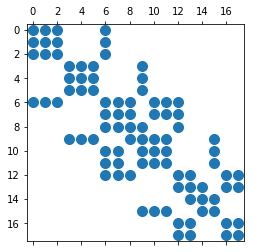

In [18]:
Knn = np.matrix(Knn)
Kaa = np.matrix(Kaa)
Kan = np.matrix(Kan)
Kna = Kan.transpose()

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.spy(K, marker='o')
plt.show()